<a href="https://colab.research.google.com/github/AfrizalDS/MachineLearning/blob/Quiz-2/quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition
# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

# **Anggota Kelompok**
### *   Afrizal Dwi Septian /2241720122
### *   Dennis Parulian Panjaitan / 2241720182
### *   Dido Imam Padmanegara / 2241720111
### *   Muhammad Paksi / 2241720150 **teks tebal



# **Mounting G-Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection**

(-0.5, 353.5, 471.5, -0.5)

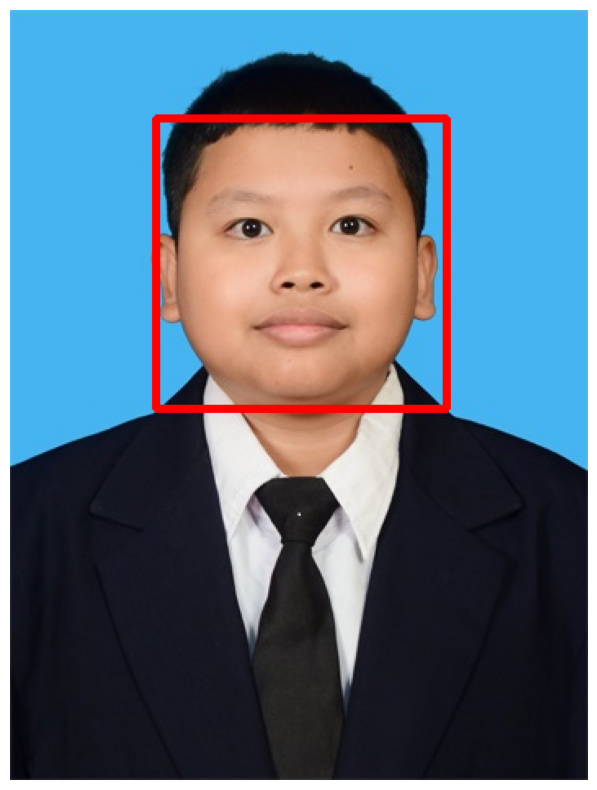

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing import image
import os

imagePath = "/content/dsc-3610-3-snhwi-e6KRM.jpg"
img = cv2.imread(imagePath)
img.shape
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_image.shape
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml"
)

face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
)
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 4)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.imshow(img_rgb)
plt.axis('off')

# **Gunakan pre-trained model faceNet untuk face recognition**


In [1]:
!pip install torch==2.5.1 torchvision==0.20.1




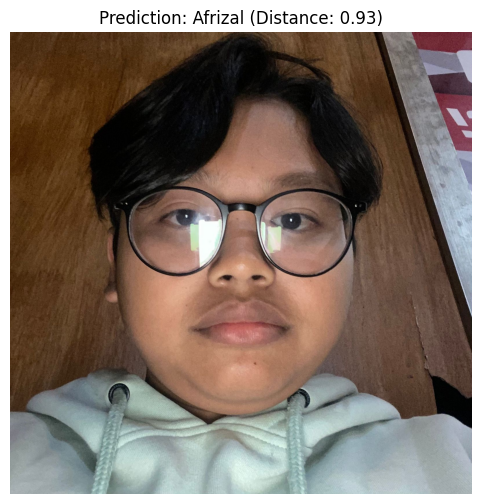

In [49]:
import os
import cv2
import numpy as np
from facenet_pytorch import InceptionResnetV1
import torch
import matplotlib.pyplot as plt

# 2. Inisialisasi model FaceNet (InceptionResnetV1)
model = InceptionResnetV1(pretrained='vggface2').eval()

# 3. Fungsi untuk memuat embedding dari dataset
def get_embeddings(dataset_path):
    embeddings = []
    labels = []

    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if not os.path.isdir(person_path):
            continue

        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Skipping invalid image: {image_path}")
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (160, 160))
            img_tensor = torch.tensor(img_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0

            embedding = model(img_tensor).detach().numpy()
            embeddings.append(embedding)
            labels.append(person_name)

    return np.array(embeddings), np.array(labels)

# 4. Fungsi untuk mengenali wajah dan menambahkan teks pada gambar
def recognize_face(image_path, embeddings, labels):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize gambar
    img_resized = cv2.resize(img_rgb, (160, 160))
    img_tensor = torch.tensor(img_resized).permute(2, 0, 1).unsqueeze(0).float() / 255.0

    # Ekstrak embedding gambar input
    face_embedding = model(img_tensor).detach().numpy()

    # Hitung jarak antara embedding input dengan dataset
    distances = np.linalg.norm(embeddings - face_embedding, axis=2)
    min_idx = np.argmin(distances)
    min_distance = distances[min_idx]

    # Ambang batas pengenalan
    if min_distance < 1.0:
        recognized_label = labels[min_idx]
    else:
        recognized_label = "Unknown"

    # Menampilkan gambar hasil prediksi tanpa teks di gambar
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')  # Menghilangkan axis
    plt.title(f"Prediction: {recognized_label} (Distance: {min_distance[0]:.2f})")  # Menambahkan distance di judul
    plt.show()

# 5. Muat dataset dan tes pengenalan wajah
dataset_path = '/content/drive/MyDrive/MachineLearning/Face-Dataset'
embeddings, labels = get_embeddings(dataset_path)

test_image_path = '/content/img221.jpg'
recognize_face(test_image_path, embeddings, labels)


# **Gunakan model CNN untuk face recognition**

In [50]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import img_to_array

# Fungsi untuk memuat dataset
def load_images(dataset_path, target_size=(160, 160)):
    images = []
    labels = []
    label_map = {}
    current_label = 0

    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if not os.path.isdir(person_path):
            continue

        if person_name not in label_map:
            label_map[person_name] = current_label
            current_label += 1

        label = label_map[person_name]

        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Skipping invalid image: {image_path}")
                continue

            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, target_size)
            img = img_to_array(img) / 255.0  # Normalisasi
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels), label_map

# Fungsi untuk membuat model CNN
def create_cnn_model(input_shape=(160, 160, 3), num_classes=2):
    model = Sequential()

    # Lapisan Konvolusi pertama
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Lapisan Konvolusi kedua
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Lapisan Konvolusi ketiga
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Flatten dan Fully Connected layer
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))  # Output layer (softmax untuk klasifikasi multi-kelas)

    # Kompilasi model
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

# Path dataset
dataset_path = '/content/drive/MyDrive/MachineLearning/Face-Dataset'

# Muat dataset
images, labels, label_map = load_images(dataset_path)

# Pisahkan dataset menjadi training dan testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Buat model CNN
model = create_cnn_model(input_shape=(160, 160, 3), num_classes=len(label_map))

# Latih model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluasi model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy * 100:.2f}%")

# Simpan model
# model.save('face_recognition_cnn_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 57s 3s/step - accuracy: 0.4430 - loss: 2.5976 - val_accuracy: 0.9578 - val_loss: 0.0967
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 56s 3s/step - accuracy: 0.9735 - loss: 0.0771 - val_accuracy: 0.9880 - val_loss: 0.0307
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 78s 3s/step - accuracy: 0.9872 - loss: 0.0652 - val_accuracy: 1.0000 - val_loss: 0.0043
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 95s 3s/step - accuracy: 1.0000 - loss: 0.0037 - val_accuracy: 1.0000 - val_loss: 0.0048
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 70s 3s/step - accuracy: 0.9925 - loss: 0.0131 - val_accuracy: 1.0000 - val_loss: 3.5078e-04
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.9995 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 5.0057e-04
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 82s 3s/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 6.2340e-04
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 81s 3s/step - accuracy: 1.0000 - loss: 1.6897e-04 - val_accuracy: 1.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
Predicted face: Afrizal


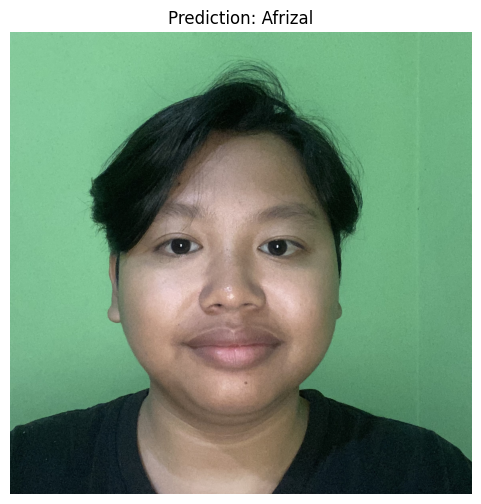

In [51]:
def predict_face(model, image_path, label_map, target_size=(160, 160)):
    # Membaca gambar
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi ke RGB


    # Persiapan gambar untuk prediksi
    img_resized = cv2.resize(img_rgb, target_size)
    img_array = img_to_array(img_resized) / 255.0  # Normalisasi

    # Prediksi
    img_array = np.expand_dims(img_array, axis=0)  # Menambahkan dimensi batch
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction, axis=1)[0]

    # Menemukan nama dari label
    for name, label in label_map.items():
        if label == predicted_label:
            predicted_name = name
            break

    print(f"Predicted face: {predicted_name}")

    # Menampilkan gambar hasil prediksi tanpa teks
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_name}")
    plt.show()

# Contoh penggunaan untuk prediksi
test_image_path = '/content/IMG_5022.jpg'
predict_face(model, test_image_path, label_map)